In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('dataset_preprocessed.csv')
df.head()

,Jurusan,Jenis transportasi yang digunakan,Permasalahan fasilitas parkir,Keamanan fasilitas parkir,Biaya parkir,Kepuasan fasilitas parkir,Tangga/lift yang paling sering dipakai,Alasan menggunakan fasilitas tangga/lift,Kepuasan terhadap fasilitas tangga/lift,Lokasi beli makanan,...,Kebersihan toilet,Kepuasan fasilitas toilet,Kepuasan secara umum,Permasalahan fasilitas parkir 1,Permasalahan fasilitas parkir 2,Permasalahan fasilitas discussion room 1,Permasalahan fasilitas discussion room 2,Permasalahan fasilitas discussion room 3,Alasan memilih beli di tempat itu 1,Alasan memilih beli di tempat itu 2
0,Computer Science,Motor pribadi,Antri keluar masuk,Aman,Iya,3,Tangga Biasa,Tidak mau menunggu/antri,3,Di dalam kampus,...,Sudah,5,4,Antri keluar masuk,NaN,Ketersediaan jam yang bisa di booking kurang,NaN,NaN,Lebih banyak variasi,Lebih dekat
1,Computer Science,Motor pribadi,"Antri keluar masuk, bayar nya mahal",Aman,Iya,2,Lift,Lebih cepat,5,Di luar kampus,...,Sudah,6,4,Antri keluar masuk,NaN,Jumlahnya ruangan sedikit,Ketersediaan jam yang bisa di booking kurang,NaN,Lebih banyak variasi,Lebih murah
2,Computer Science,Motor pribadi,"Parkir penuh, Tempatnya terbuka",Aman,Iya,3,Lift,Lebih nyaman digunakan,5,Di dalam kampus,...,Sudah,4,4,Parkir penuh,Tempatnya terbuka,Jumlahnya ruangan sedikit,Ketersediaan jam yang bisa di booking kurang,Discussion room yang di booking tapi tidak dig...,Lebih dekat,NaN
3,Computer Science,Motor pribadi,"Parkir penuh, Antri keluar masuk",Aman,Tidak,2,Tangga Darurat,Lebih cepat,3,Di dalam kampus,...,Sudah,5,4,Parkir penuh,Antri keluar masuk,Ketersediaan jam yang bisa di booking kurang,NaN,NaN,Kebersihan,Lebih dekat
4,Computer Science,Motor pribadi,"Parkir penuh, Tempatnya terbuka",Tidak Aman,Tidak,1,Tangga Darurat,Lebih cepat,3,Di luar kampus,...,Sudah,4,4,Parkir penuh,Tempatnya terbuka,Jumlahnya ruangan sedikit,Ketersediaan jam yang bisa di booking kurang,NaN,Lebih banyak variasi,Tidak antri


# Jurusan

[]

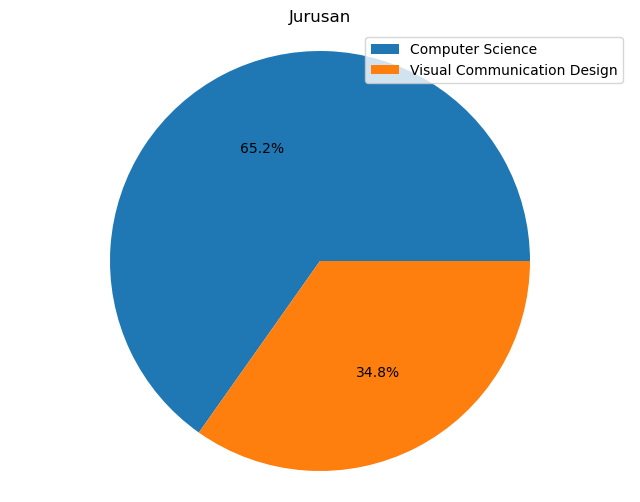

In [112]:
jurusan = df.groupby('Jurusan').size().reset_index(name="count")

plt.figure(figsize=(8,6))
plt.pie(jurusan['count'], autopct='%1.1f%%')
plt.title('Jurusan')
plt.legend(loc='best', labels = jurusan['Jurusan'])
plt.axis('equal')

plt.plot()

# Parkir

In [113]:
parkir1 = df[['Jenis transportasi yang digunakan', 'Permasalahan fasilitas parkir 1']].rename(columns={'Permasalahan fasilitas parkir 1':'Permasalahan fasilitas parkir'})
parkir2 = df[['Jenis transportasi yang digunakan', 'Permasalahan fasilitas parkir 2']].rename(columns={'Permasalahan fasilitas parkir 2':'Permasalahan fasilitas parkir'})


parkir = pd.concat([parkir1, parkir2], ignore_index=True)

parkir.dropna(inplace=True)
parkir

,Jenis transportasi yang digunakan,Permasalahan fasilitas parkir
0,Motor pribadi,Antri keluar masuk
1,Motor pribadi,Antri keluar masuk
2,Motor pribadi,Parkir penuh
3,Motor pribadi,Parkir penuh
4,Motor pribadi,Parkir penuh
...,...,...
133,Jalan kaki,Antri keluar masuk
134,Motor pribadi,Tempatnya terbuka
135,Motor pribadi,Tempatnya terbuka
136,Motor pribadi,Tempatnya terbuka


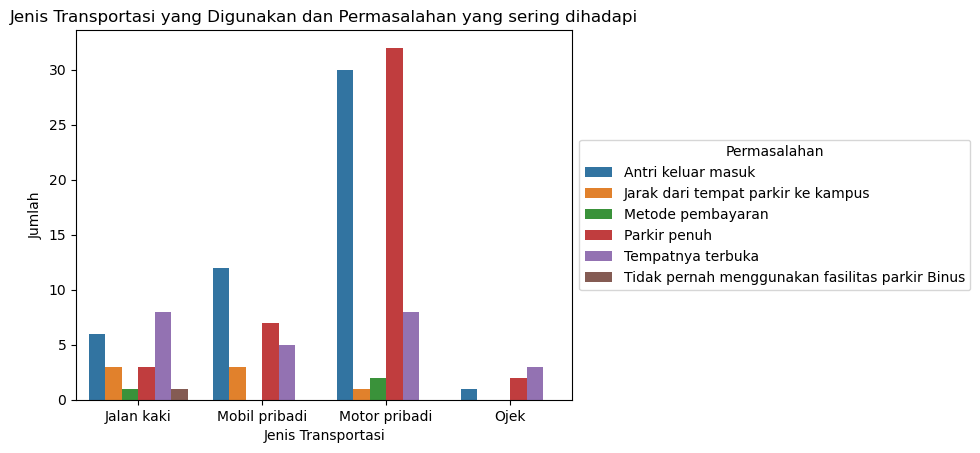

In [114]:
sns.barplot(parkir.groupby(['Jenis transportasi yang digunakan', 'Permasalahan fasilitas parkir']).size().reset_index(name="count"), 
            x='Jenis transportasi yang digunakan', y='count', hue='Permasalahan fasilitas parkir')

plt.title("Jenis Transportasi yang Digunakan dan Permasalahan yang sering dihadapi")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Permasalahan')
plt.xlabel("Jenis Transportasi")
plt.ylabel("Jumlah")

plt.show()

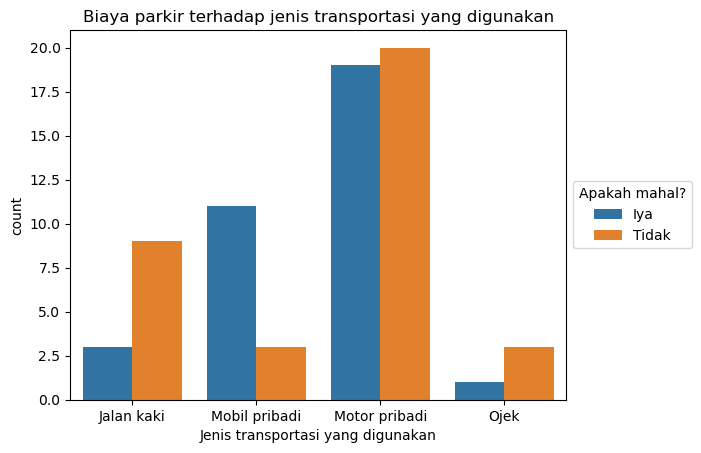

In [115]:
sns.barplot(df.groupby(['Jenis transportasi yang digunakan', 'Biaya parkir']).size().reset_index(name="count")
            , x='Jenis transportasi yang digunakan', y='count', hue='Biaya parkir')

plt.title("Biaya parkir terhadap jenis transportasi yang digunakan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Apakah mahal?')

plt.show()

[]

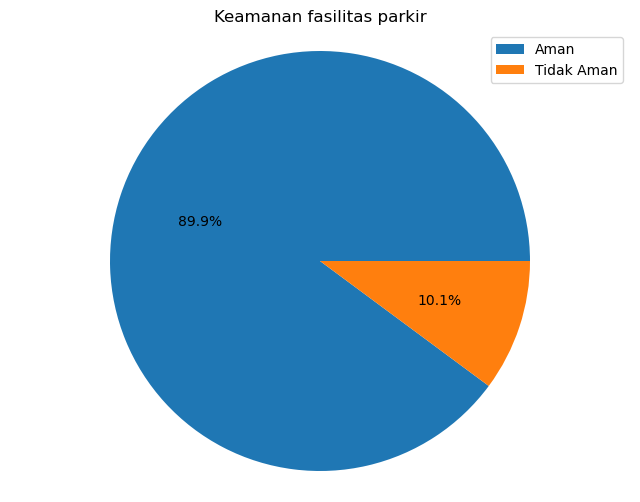

In [116]:
security = df.groupby('Keamanan fasilitas parkir').size().reset_index(name="count")

plt.figure(figsize=(8,6))
plt.pie(security['count'], autopct='%1.1f%%')
plt.title('Keamanan fasilitas parkir')
plt.legend(loc='best', labels = security['Keamanan fasilitas parkir'])
plt.axis('equal')

plt.plot()

# Discussion Room

In [117]:
room1 = df[['Frekuensi penggunaan discussion room', 'Permasalahan fasilitas discussion room 1']].rename(columns={'Permasalahan fasilitas discussion room 1':'Permasalahan fasilitas discussion room'})
room2 = df[['Frekuensi penggunaan discussion room', 'Permasalahan fasilitas discussion room 2']].rename(columns={'Permasalahan fasilitas discussion room 2':'Permasalahan fasilitas discussion room'})
room3 = df[['Frekuensi penggunaan discussion room', 'Permasalahan fasilitas discussion room 3']].rename(columns={'Permasalahan fasilitas discussion room 3':'Permasalahan fasilitas discussion room'})


room = pd.concat([room1, room2, room3], ignore_index=True)

room.dropna(inplace=True)
room

,Frekuensi penggunaan discussion room,Permasalahan fasilitas discussion room
0,Tidak,Ketersediaan jam yang bisa di booking kurang
1,Ya,Jumlahnya ruangan sedikit
2,Ya,Jumlahnya ruangan sedikit
3,Ya,Ketersediaan jam yang bisa di booking kurang
4,Ya,Jumlahnya ruangan sedikit
...,...,...
192,Tidak,Ukuran terlalu kecil
193,Ya,Discussion room yang di booking tapi tidak dig...
195,Ya,Discussion room yang di booking tapi tidak dig...
197,Tidak,Discussion room yang di booking tapi tidak dig...


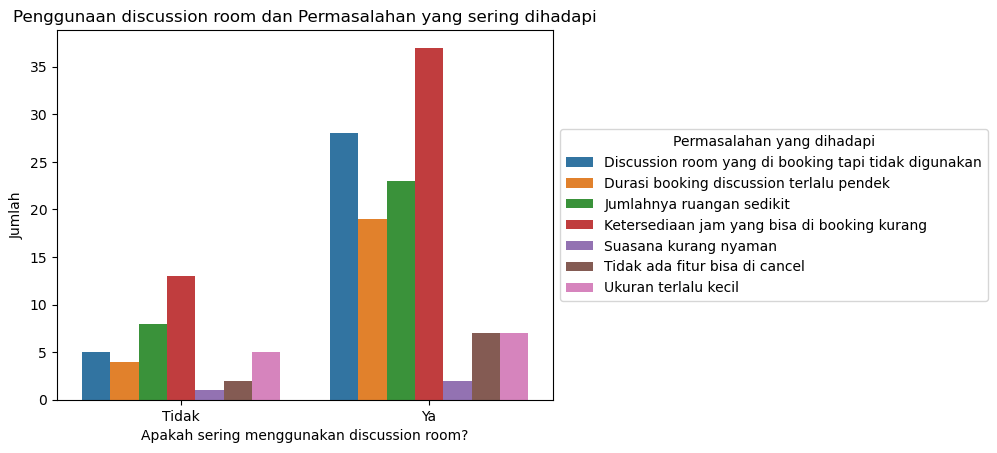

In [118]:
sns.barplot(room.groupby(['Frekuensi penggunaan discussion room', 'Permasalahan fasilitas discussion room']).size().reset_index(name="count"), 
            x='Frekuensi penggunaan discussion room', y='count', hue='Permasalahan fasilitas discussion room')

plt.title("Penggunaan discussion room dan Permasalahan yang sering dihadapi")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Permasalahan yang dihadapi')
plt.xlabel("Apakah sering menggunakan discussion room?")
plt.ylabel("Jumlah")

plt.show()

# Kantin

In [119]:
kantin1 = df[['Lokasi beli makanan', 'Alasan memilih beli di tempat itu 1']].rename(columns={'Alasan memilih beli di tempat itu 1':'Alasan memilih beli di tempat itu'})
kantin2 = df[['Lokasi beli makanan', 'Alasan memilih beli di tempat itu 2']].rename(columns={'Alasan memilih beli di tempat itu 2':'Alasan memilih beli di tempat itu'})


kantin = pd.concat([kantin1, kantin2], ignore_index=True)

kantin.dropna(inplace=True)
kantin

,Lokasi beli makanan,Alasan memilih beli di tempat itu
0,Di dalam kampus,Lebih banyak variasi
1,Di luar kampus,Lebih banyak variasi
2,Di dalam kampus,Lebih dekat
3,Di dalam kampus,Kebersihan
4,Di luar kampus,Lebih banyak variasi
...,...,...
133,Di dalam kampus,Lebih dekat
134,Di luar kampus,Tidak antri
135,Di luar kampus,Lebih murah
136,Di dalam kampus,Lebih dekat


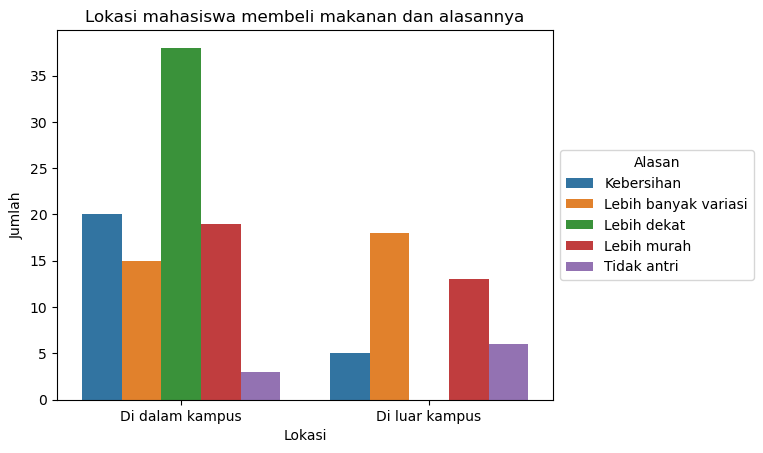

In [120]:
sns.barplot(kantin.groupby(['Lokasi beli makanan', 'Alasan memilih beli di tempat itu']).size().reset_index(name="count"), 
            x='Lokasi beli makanan', y='count', hue='Alasan memilih beli di tempat itu')

plt.title("Lokasi mahasiswa membeli makanan dan alasannya")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Alasan')
plt.xlabel("Lokasi")
plt.ylabel("Jumlah")

plt.show()